In [5]:
#part 6
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.tools.plotting import scatter_matrix
from scipy import stats
from scipy.stats import uniform as sp_rand
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import math
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
from Feature_Engineering import DfAfterFE

df = pd.read_csv('energydata_complete.csv')
df1 = DfAfterFE(df)
df1.feature_engineering()
new_df = df1.df
X = new_df.drop(columns=['date', 'Appliances', 'rv1', 'rv2'])
X.info()
y = new_df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 35 columns):
lights                    19735 non-null int64
T1                        19735 non-null float64
RH_1                      19735 non-null float64
T2                        19735 non-null float64
RH_2                      19735 non-null float64
T3                        19735 non-null float64
RH_3                      19735 non-null float64
T4                        19735 non-null float64
RH_4                      19735 non-null float64
T5                        19735 non-null float64
RH_5                      19735 non-null float64
T6                        19735 non-null float64
RH_6                      19735 non-null float64
T7                        19735 non-null float64
RH_7                      19735 non-null float64
T8                        19735 non-null float64
RH_8                      19735 non-null float64
T9                        19735 non-null float64
RH_9       

# find appropriate parameters for random forest regressor

In [3]:
scores = []
estimators = np.arange(1,500,100)
for estimator in estimators:
    rf = RandomForestRegressor(n_estimators = estimator , random_state = 0)
    this_score = np.mean(model_selection.cross_val_score(rf, X_train, y_train, cv=10))
    scores.append(this_score)

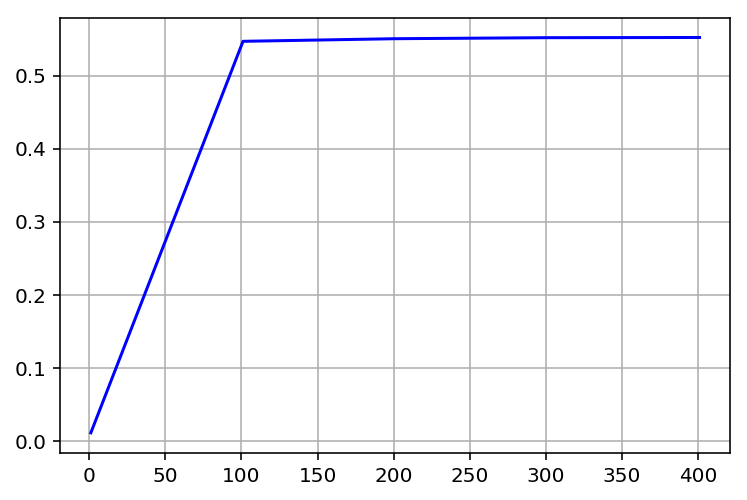

In [4]:
plt.plot(estimators, np.array(scores), '-b')
plt.grid()
plt.show()
max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_num_trees = estimators[max_score_pos]

In [7]:
print scores

[0.011294046003472221, 0.54681793699715, 0.5503834130395859, 0.5517797097805641, 0.5520494464939416]


[72.06886702526019]
[72.06886702526019, 72.02594200614807]
[72.06886702526019, 72.02594200614807, 71.98327472852729]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168, 71.99332444265696]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168, 71.99332444265696, 72.00138795438191]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168, 71.99332444265696, 72.00138795438191, 72.00103481641462]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168, 71.99332444265696, 72.00138795438191, 72.00103481641462, 71.97898521316228]
[72.06886702526019, 72.02594200614807, 71.98327472852729, 71.93882065608142, 72.04946271029168, 71.99332444265696, 72.00138795438191, 72

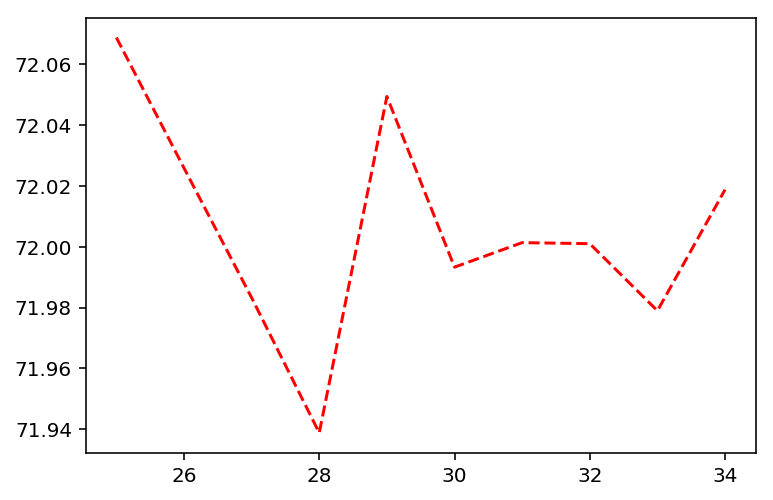

In [32]:
depth_list = []
rmse_test_list = []
for i in range(25, 35):
    rf = RandomForestRegressor(n_estimators=200, max_depth=i)
    depth_list.append(i)
    rmse_test = model_selection.cross_val_score(rf, X_train, y_train, n_jobs=5, cv=3, scoring='neg_mean_squared_error')
    rmse_test_list.append(math.sqrt(np.mean(-rmse_test)))
    print rmse_test_list

plt.plot(depth_list, rmse_test_list, '--r')

In [9]:
from Error_Metrics import ErrorMetrics

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)

error_metrics = ErrorMetrics(X_train_, y_train, X_test_, y_test)

lm = LinearRegression()
lm.fit(X_train_, y_train)

error_metrics.cal_metric('Quadratic Linear Regression', lm)

optimal_rf = RandomForestRegressor(n_estimators=200, max_depth=28)
optimal_rf.fit(X_train, y_train)
optimal_nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000,batch_size=600,
                    solver='sgd',  random_state=1,activation="logistic",learning_rate="constant",
                          alpha=0.01, momentum=0.7, learning_rate_init=0.01)
optimal_nn.fit(X_train, y_train)

error_metrics.X_train = X_train
error_metrics.X_test = X_test
error_metrics.cal_metric('Random Forest', optimal_rf)
error_metrics.cal_metric('Neural Network', optimal_nn)
error_metrics.error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,Quadratic Linear Regression,50.305300,46.264116,56.003835,53.470374,0.306722,0.386887,88.405929,79.295166
0,Random Forest,34.031849,11.954068,31.901336,12.071304,0.519952,0.938554,73.564821,25.102843
0,Neural Network,53.737333,51.801905,35.312893,35.235218,-0.215938,-0.216746,117.080241,111.705973


In [18]:
quadratic_scores = model_selection.cross_val_score(lm, X_train_, y_train, cv=10, scoring='neg_mean_squared_error')

In [11]:
rf_scores = model_selection.cross_val_score(optimal_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [32]:
nn_scores = model_selection.cross_val_score(optimal_nn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

/Users/marcus/venv0/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [33]:
lm_rmse = [math.sqrt(-quadratic_scores[i]) for i in range(len(rf_scores))]
rf_rmse = [math.sqrt(-rf_scores[i]) for i in range(len(rf_scores))]
nn_rmse = [math.sqrt(-nn_scores[i]) for i in range(len(rf_scores))]

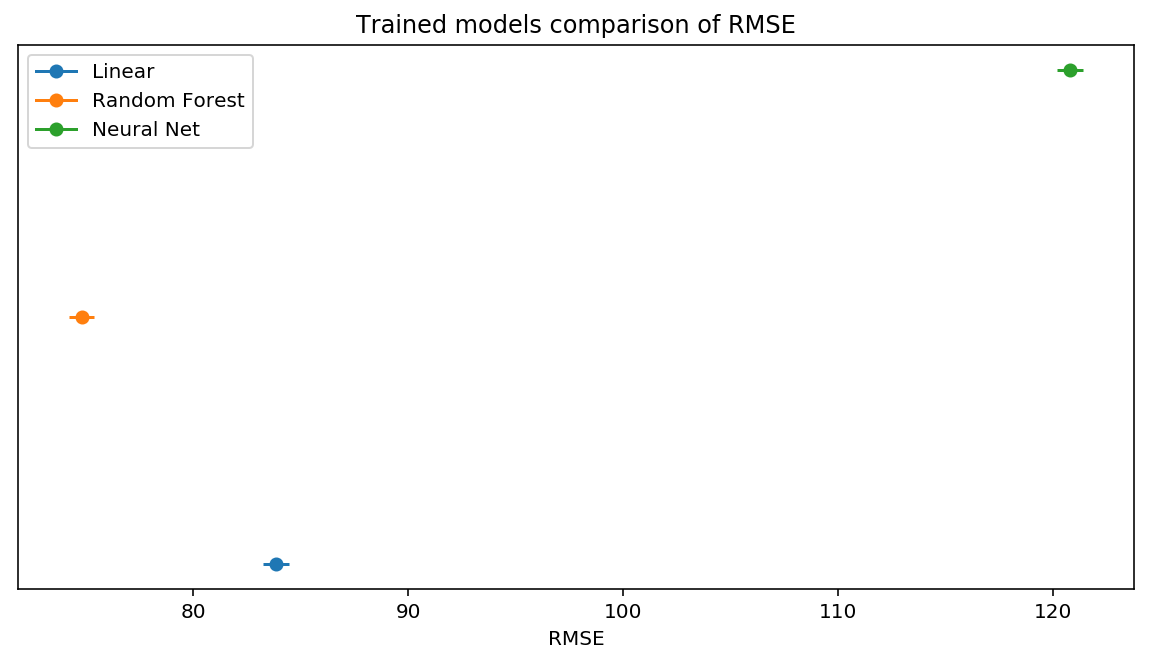

In [49]:
from scipy.stats.distributions import t as tdist

alpha = 0.95
legends = []
y1 = lm_rmse
mean1 = np.mean(y1)
std1 = np.std(y1)
conf_interval1 = tdist.ppf(1-alpha/2., len(y1) -1) * std*np.sqrt(1.+1./len(y1))
legends.append('Quadratic Model')

y2 = rf_rmse
mean2 = np.mean(y2)
std2 = np.std(y2)
conf_interval2 = tdist.ppf(1-alpha/2., len(y2) -1) * std*np.sqrt(1.+1./len(y2))
legends.append('Random Forest')

y3 = nn_rmse
mean3 = np.mean(y3)
std3 = np.std(y3)
conf_interval3 = tdist.ppf(1-alpha/2., len(y3) -1) * std*np.sqrt(1.+1./len(y3))
legends.append('Neural Network')


plt.figure(figsize=(10,5))
fig = plt.gca()
line1 = plt.errorbar(mean1,1, xerr=conf_interval1, fmt='-o')
line2 = plt.errorbar(mean2,2, xerr=conf_interval2, fmt='-o')
line3 = plt.errorbar(mean3,3, xerr=conf_interval3, fmt='-o')
plt.legend(['Linear', 'Random Forest', 'Neural Net'],
           loc='upper left',
           numpoints=1,
           fancybox=True)
fig.axes.get_yaxis().set_visible(False)
fig.set_label
plt.xlabel('RMSE')
plt.title('Trained models comparison of RMSE')
plt.show()

In [52]:
optimal_rf2 = RandomForestRegressor(n_estimators=200, max_depth=28, max_features=0.8, 
                                   min_samples_leaf=1, min_samples_split=7)
optimal_rf2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
error_metrics.cal_metric('Random Forest2', optimal_rf2)
error_metrics.error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,Quadratic Linear Regression,50.305300,46.264116,56.003835,53.470374,0.306722,0.386887,88.405929,79.295166
0,Random Forest,34.031849,11.954068,31.901336,12.071304,0.519952,0.938554,73.564821,25.102843
0,Neural Network,53.737333,51.801905,35.312893,35.235218,-0.215938,-0.216746,117.080241,111.705973
0,Random Forest2,35.055201,16.466893,33.017050,16.356763,0.505697,0.878334,74.649081,35.323346
